In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as sps

In [4]:
df = pd.read_csv('games.csv')
df.columns = df.columns.str.lower()

In [28]:
df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [17]:
df['zscore'] = sps.zscore(df.na_sales)

In [61]:
df_nin_sports = df.query('publisher == "Nintendo" and genre == "Sports"')
df_nin_sports['zscore'] = sps.zscore(df_nin_sports.na_sales)
df_nin_sports.sort_values('zscore')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,zscore
14626,14629,Calcio Bit,GBA,2006.0,Sports,Nintendo,0.00,0.00,0.03,0.00,0.03,-0.299733
12123,12125,Mario Tennis,Wii,2010.0,Sports,Nintendo,0.00,0.06,0.00,0.01,0.07,-0.299733
4981,4983,Super Soccer,SNES,1991.0,Sports,Nintendo,0.00,0.00,0.38,0.00,0.38,-0.299733
3435,3437,Kirby's Dream Course,SNES,1994.0,Sports,Nintendo,0.00,0.00,0.59,0.00,0.59,-0.299733
7901,7903,Active Health with Carol Vorderman,DS,2009.0,Sports,Nintendo,0.00,0.18,0.00,0.01,0.19,-0.299733
2592,2594,Capcom's Soccer Shootout,SNES,1993.0,Sports,Nintendo,0.00,0.00,0.80,0.00,0.80,-0.299733
10035,10037,Pocket Soccer League: Calciobit,3DS,2012.0,Sports,Nintendo,0.00,0.00,0.11,0.00,0.11,-0.299733
11923,11925,Itoi Shigesato no Bass Tsuri No. 1 Ketteihan!,N64,2000.0,Sports,Nintendo,0.00,0.00,0.07,0.00,0.07,-0.299733
8449,8451,Itoi Shigesato no Bass Tsuri No. 1,SNES,1997.0,Sports,Nintendo,0.00,0.00,0.17,0.00,0.17,-0.299733
5988,5990,Punch-Out!!,Wii,2007.0,Sports,Nintendo,0.02,0.22,0.05,0.00,0.29,-0.296395


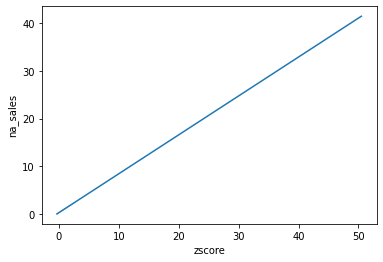

In [22]:
sns.lineplot(x = df['zscore'], y = df['na_sales'])

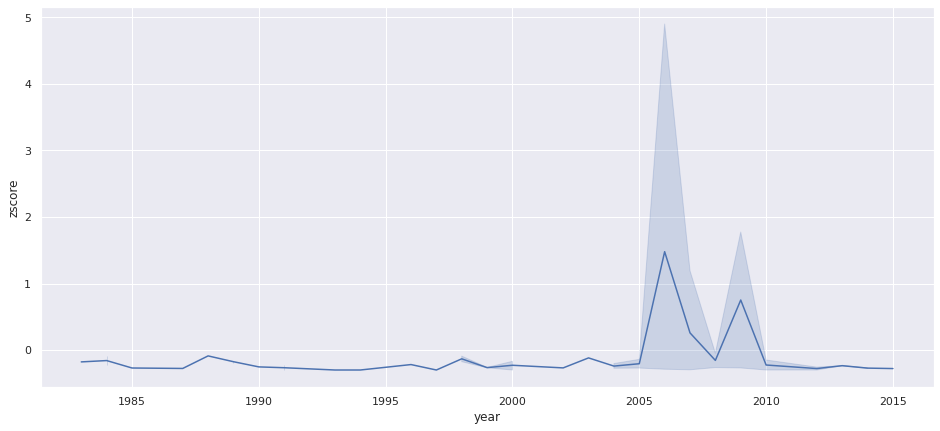

In [60]:
sns.set(rc = {'figure.figsize':(16,7)})
sns.lineplot(data=df_nin_sports, x='year', y='zscore')

In [50]:
df.shape

(16598, 12)

In [41]:
df.na_sales.mean()

0.26466742981082064

In [12]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [35]:
df.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [36]:
df.isna().sum()

rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

In [37]:
df.dropna(inplace=True)

In [39]:
df

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


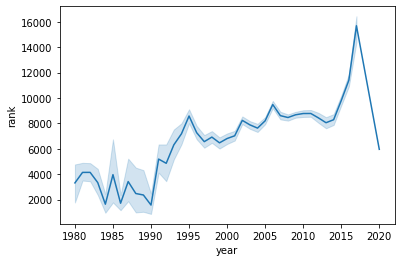

In [41]:
sns.lineplot(data=df,x='year',y='rank')

In [92]:
df.year.mean()

2006.4055613528942

In [118]:
pd.DataFrame(df.platform.value_counts(normalize=True)).query('platform > 0.07').index.values

array(['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS'], dtype=object)

In [58]:
df.groupby('publisher', as_index=False).agg({'rank': 'count'}).sort_values('rank', ascending=False)

,publisher,rank
138,Electronic Arts,1339
21,Activision,966
347,Namco Bandai Games,928
524,Ubisoft,918
275,Konami Digital Entertainment,823
...,...,...
149,Ertain,1
147,Epic Games,1
447,Seventh Chord,1
145,Enjoy Gaming ltd.,1


In [122]:
df[['na_sales','eu_sales','jp_sales','other_sales']].median().idxmax()

'na_sales'

In [119]:
df.query('publisher == "Nintendo"') \
    .groupby('genre').jp_sales.agg(['count','mean','median']) \
    .sort_values('median')

,count,mean,median
genre,,,
Adventure,35,0.257429,0.090
Shooter,24,0.251250,0.130
Action,78,0.373846,0.170
Strategy,31,0.337419,0.190
Misc,100,0.552500,0.250
Sports,55,0.652182,0.250
Puzzle,74,0.501216,0.255
Racing,37,0.789730,0.340
Role-Playing,105,0.970952,0.360


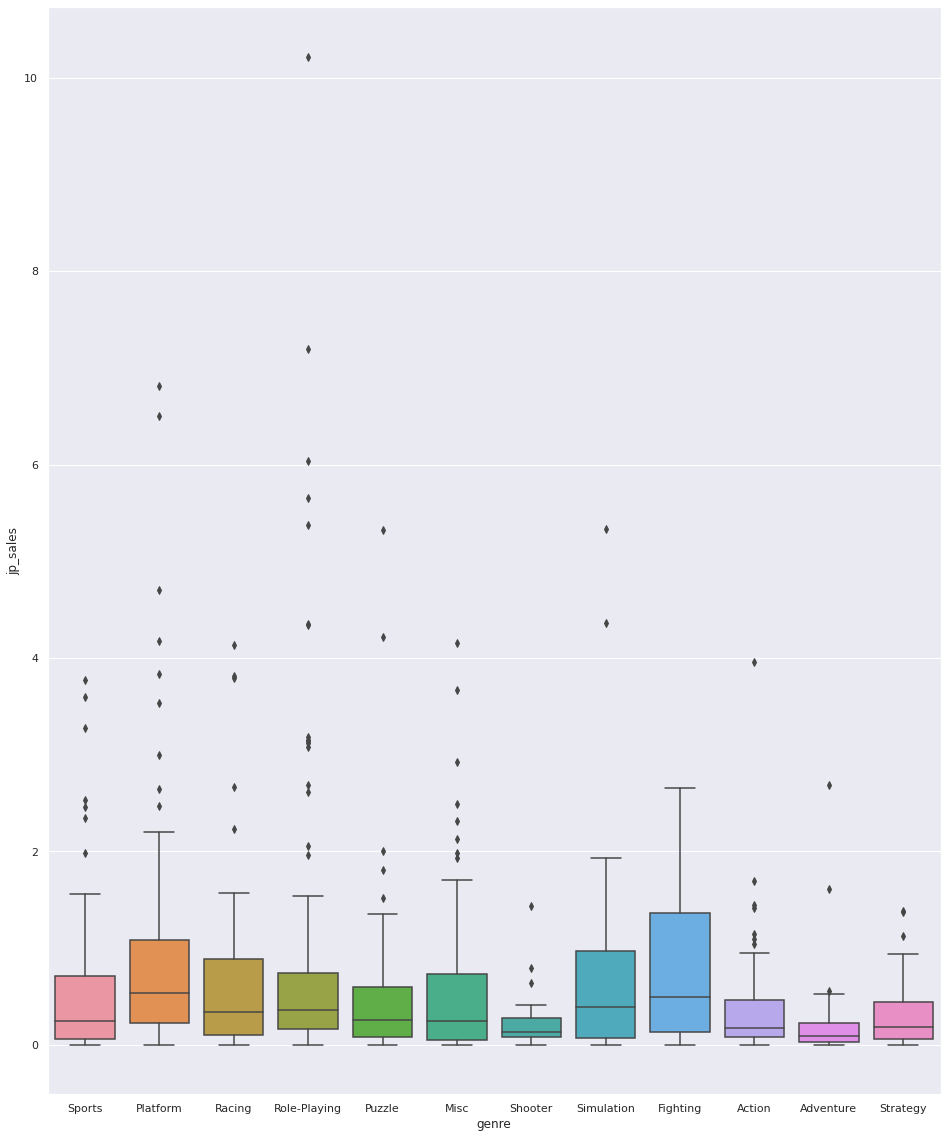

In [129]:
sns.set(rc = {'figure.figsize':(16,20)})
sns.boxplot(data=df.query('publisher == "Nintendo"'), x='genre', y='jp_sales')

In [142]:
Nintendo = df.query('publisher == "Nintendo" and genre in ("Fighting", "Simulation", "Platform", "Racing", "Sports")').groupby(['year','genre'], as_index=False).global_sales.sum()

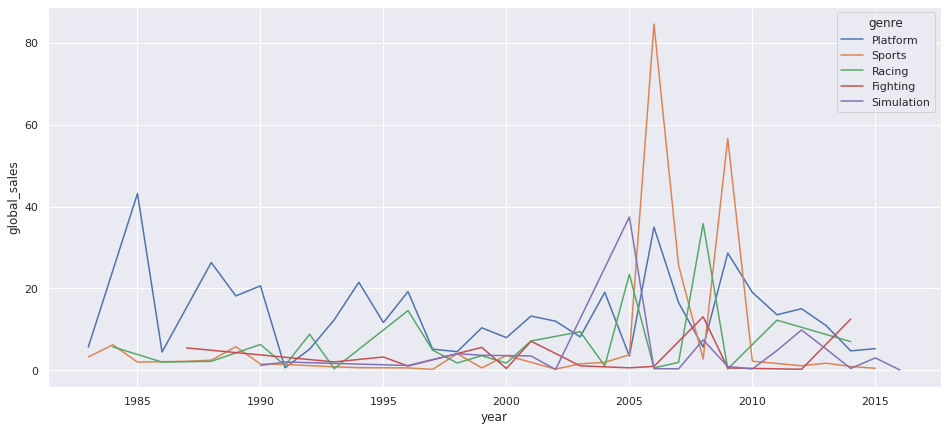

In [143]:
sns.set(rc = {'figure.figsize':(16,7)})
sns.lineplot(data=Nintendo, x='year', y='global_sales', hue='genre')